In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Chebyshev:
    """
    Chebyshev(a, b, n, func)
    Given a function func, lower and upper limits of the interval [a,b],
    and maximum degree n, this class computes a Chebyshev approximation
    of the function.
    Method eval(x) yields the approximated function value.
    """
    def __init__(self, a, b, n, func):
        self.a = a
        self.b = b
        self.func = func
        
        bma = 0.5 * (b - a)
        bpa = 0.5 * (b + a)
        f = [func(math.cos(math.pi * (k + 0.5) / n) * bma + bpa) for k in range(n)]
        self.roots = f
        
        self.x = [math.cos(math.pi * (k + 0.5) / n) * bma + bpa for k in range(n)]

        fac = 2.0 / n
        self.c = [fac * sum([f[k] * math.cos(math.pi * j * (k + 0.5) / n)
                  for k in range(n)]) for j in range(n)]

    def eval(self, x):
        a,b = self.a, self.b
        #assert(a <= x <= b)
        y = (2.0 * x - a - b) * (1.0 / (b - a))
        y2 = 2.0 * y
        (d, dd) = (self.c[-1], 0)             # Special case first step for efficiency
        for cj in self.c[-2:0:-1]:            # Clenshaw's recurrence
            (d, dd) = (y2 * d - dd + cj, d)
        return y * d - dd + 0.5 * self.c[0]   # Last step is different
    
def sgn_chebyshev(x):
    return Chebyshev(-10, 10, 200, sgn).eval(x)

def equal_chebyshev(x):
    return Chebyshev(-10, 10, 100, sgn).eval(equal_zero)


In [2]:
def sign(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0.5
    else:
        return 0

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-k * x))

In [4]:
def relu(x):
    return max(0, x)

In [5]:
k = 25

Degree of the poly: 16


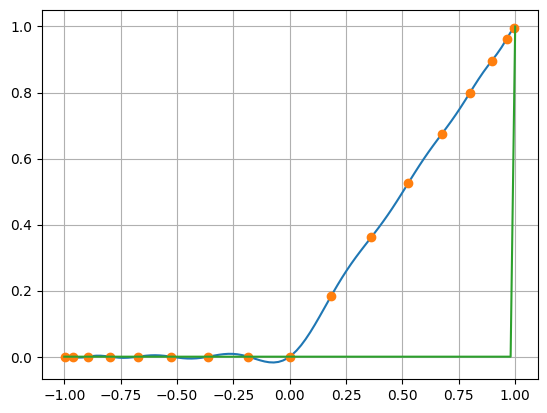

In [12]:
fun = relu
n = 17

c = Chebyshev(-1, 1, n, fun)
print("Degree of the poly: " + str(n - 1))
x = np.linspace(-1, 1, 100)
y = np.vectorize(c.eval)(x)


plt.grid()
plt.plot(x, y)
plt.plot(c.x, np.vectorize(fun)(c.x), 'o')
plt.plot(x, np.vectorize(fun)(x))
plt.show()

In [8]:
for i in range(len(x)):
    print(str(x[i]) + ", " + str(y[i]))

-1.0, 0.00029891292239658807
-0.9797979797979798, -0.00030979947046927414
-0.9595959595959596, -4.789505456226362e-05
-0.9393939393939394, 0.00026096014959059444
-0.9191919191919192, 0.00034441805307805495
-0.898989898989899, 0.0002068560013843701
-0.8787878787878788, -4.031590950964725e-05
-0.8585858585858586, -0.0002746899852215101
-0.8383838383838383, -0.0004091816866962916
-0.8181818181818181, -0.00040661411766185207
-0.797979797979798, -0.00027572517794460794
-0.7777777777777778, -5.791454370918103e-05
-0.7575757575757576, 0.0001889666139431867
-0.7373737373737373, 0.0004057998662745921
-0.7171717171717171, 0.0005441165878574128
-0.696969696969697, 0.0005737742909691645
-0.6767676767676767, 0.0004863013708985564
-0.6565656565656566, 0.00029439490750016173
-0.6363636363636364, 2.8391325705867665e-05
-0.6161616161616161, -0.0002693184970125051
-0.5959595959595959, -0.000550941573685737
-0.5757575757575757, -0.0007700931163586722
-0.5555555555555556, -0.0008879960414114318
-0.5353535

In [11]:
for i in range(len(c.x)):
    print(str(c.x[i]) + ", " + str(c.eval(c.x[i])))

0.9951847266721969, 0.995184726672197
0.9569403357322088, 0.9569403357322089
0.881921264348355, 0.8819212643483546
0.773010453362737, 0.7730104533627374
0.6343932841636455, 0.6343932841636453
0.4713967368259978, 0.4713967368259979
0.29028467725446233, 0.2902846772544624
0.09801714032956077, 0.09801714032956083
-0.09801714032956065, -2.220446049250313e-16
-0.29028467725446216, 0.0
-0.4713967368259977, -3.3306690738754696e-16
-0.6343932841636454, 2.220446049250313e-16
-0.773010453362737, -2.220446049250313e-16
-0.8819212643483549, 1.1102230246251565e-16
-0.9569403357322088, -2.220446049250313e-16
-0.9951847266721968, 5.551115123125783e-17


In [27]:
def stupidf(x):
    if x > 1:
        return 1/x
    elif x >= -1 and x <= 1:
        return x
    else:
        return 1/x

## High-degree approximations

With $\delta = 0.01$

Error in 0.01: 0.0004456100732289636


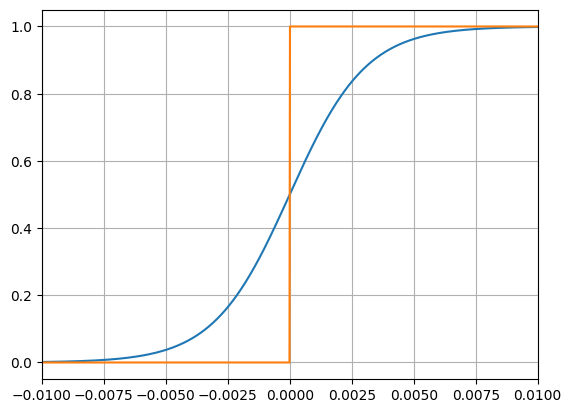

In [8]:
k = 650
n = 1001

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.01: " + str(c.eval(-0.01)))

plt.xlim(-0.01, 0.01)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

With $\delta = 0.001$

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.01: 0.009206680595516215


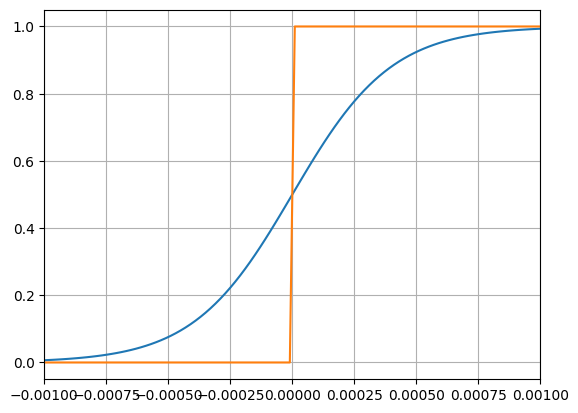

In [91]:
k = 5000
n = 7901

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.01: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.01: 0.0070723379024761335


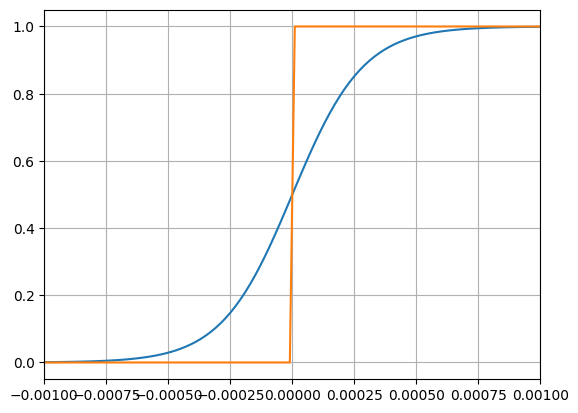

In [92]:
k = 7000
n = 7901

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.01: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -0.0001462511890379936


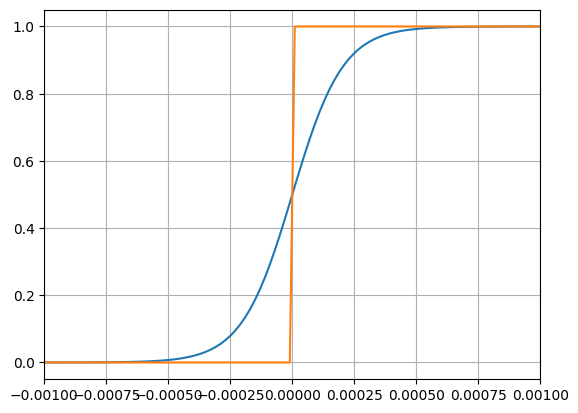

In [95]:
k = 9800
n = 15999

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.001: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -0.00010660929776895589


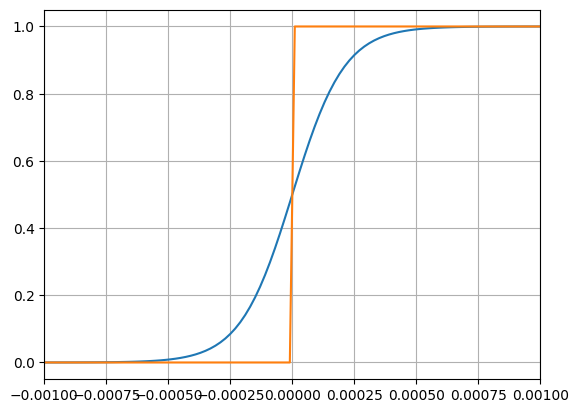

In [97]:
k = 9500
n = 15999

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.001: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -0.0001255549565127856


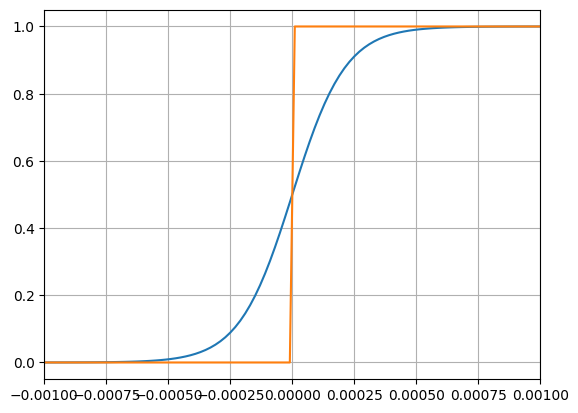

In [100]:
k = 9300
n = 16101

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.001: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -0.00011662932121658809


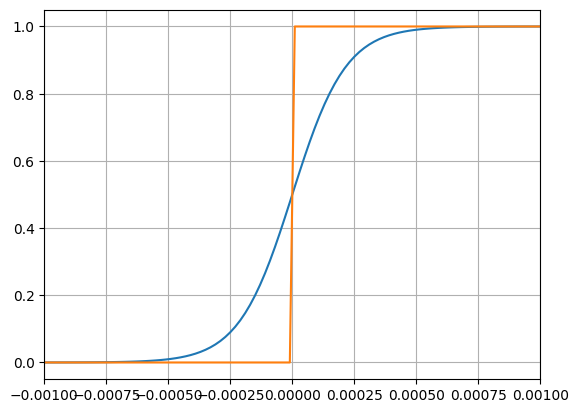

In [102]:
k = 9250
n = 16101

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 1000000)

vectorized_sigmoid = np.vectorize(c.eval)
y = vectorized_sigmoid(x)

print("Error in 0.001: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

In [10]:
k = 9250
n = 16199

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)


print("Error in 0.001: " + str(c.eval(-0.001)))

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_1863/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -0.00015723580472759568


In [35]:
k = 9301
n = 16199

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)


print("Error in 0.001: " + str(c.eval(-0.001)))

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_1863/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -0.00016721035902123038


In [34]:
k = 9300
n = 16199

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)


print("Error in 0.001: " + str(c.eval(-0.001)))

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_1863/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -0.0001670167991726368


In [ ]:
x = np.linspace(-0.1, 0.1, 1000)

vectorized_sigmoid = np.vectorize(c.eval)
y = vectorized_sigmoid(x)

print("Error in 0.001: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


Error in 0.001: -9.812046805113273e-05


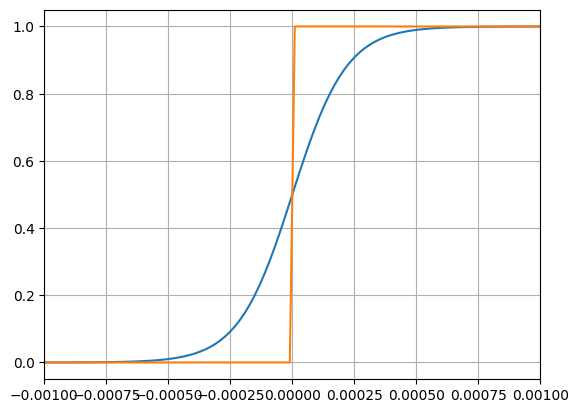

In [104]:
k = 9150
n = 16101

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

print("Error in 0.001: " + str(c.eval(-0.001)))

plt.xlim(-0.001, 0.001)
plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

With $\delta = 0.0001$

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


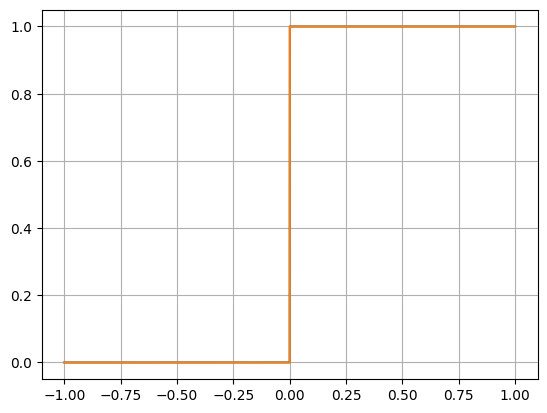

In [51]:
k = 15000
n = 32001

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

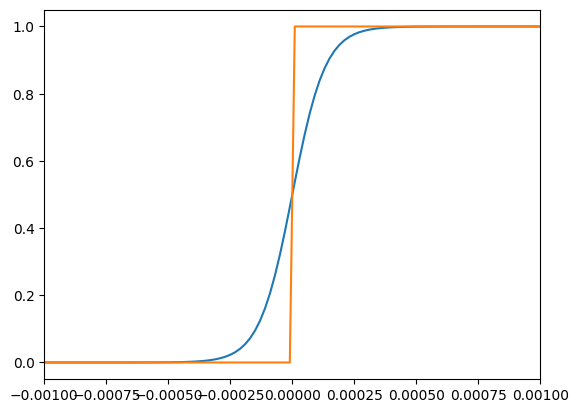

In [52]:
plt.xlim(-0.001, 0.001)
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))

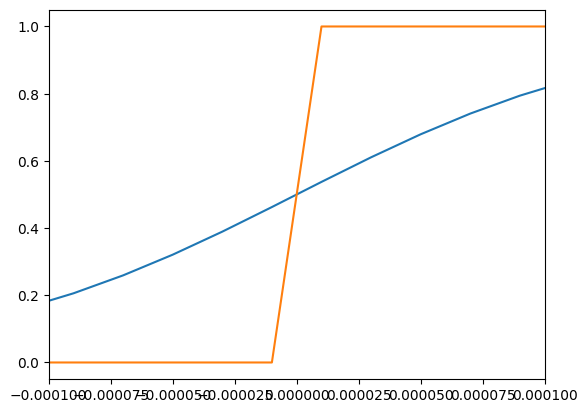

In [53]:
plt.xlim(-0.0001, 0.0001)
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))

Still too far, let's increase $k$ and hope it does not break

/var/folders/f4/cjlhwcw50v97ltsgj1fxyssm0000gn/T/ipykernel_2670/67177262.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-k * x))


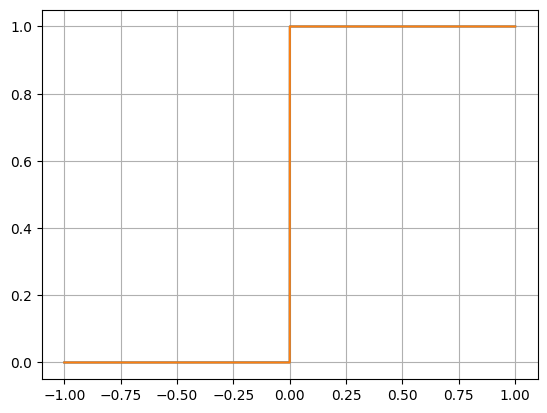

In [54]:
k = 30000
n = 32001

fun = sigmoid

c = Chebyshev(-1, 1, n, fun)

x = np.linspace(-1, 1, 100000)

vectorized_sigmoid = np.vectorize(sigmoid)
y = vectorized_sigmoid(x)

plt.grid()
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))
plt.show()

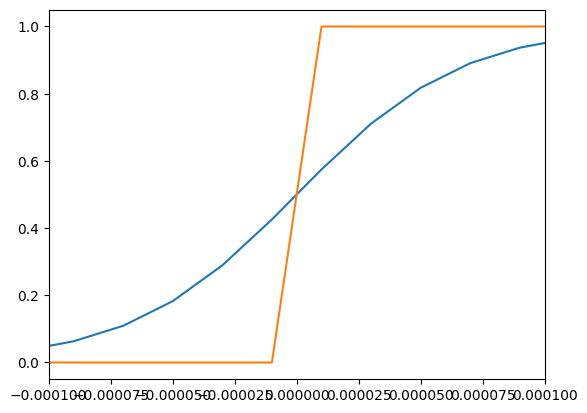

In [55]:
plt.xlim(-0.0001, 0.0001)
plt.plot(x, y)
plt.plot(x, np.vectorize(sign)(x))